In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import IPython.display

plt.rcParams['font.family'] = ["D2Coding"]

# 1차 스플라인
스플라인 함수는 어떤 매끄러운 조건을 가진 다항식의 조각이다. 이것의 간단한 예는 다변형 함수(또는 1차 스플라인)이다.

1차 스플라인 함수를 수학적 용어로 정의하면 다음과 같다.
$$
S(x) = \begin{cases} S_0(x) & x\in[t_0,t_1]\\S_1(x) & x\in[t_1,t_2] \\ \vdots & \vdots \\ S_n-1(x) & x\in[t_{n-1},t_n] \end{cases}
$$

이때, $S_i(x)=a_{i}x+b_i$

이 복잡하게 나타나는 이유는 $S(x)$의 각 조각이 선형 다항식이기 때문이다. 이러한 $S(x)$를 **구간별 선형 함수**라고 한다. 만약 $S$가 연속이면 이 함수를 **1차 스플라인**이라고 한다.

이 함수를 기울기를 상용한 식으로 변환할 수 있다.

$$S_i(x)=y_i+m_i(x-t_i)$$

이때, 기울기 $m_i$은 이것이다. $$m_i=\frac{y_{i+1}-y_i}{t_{i+1}-t_i}$$

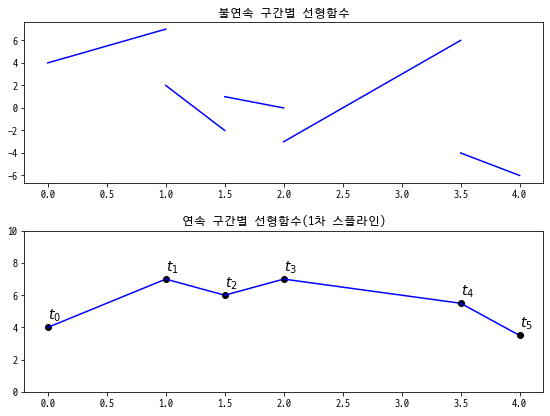

In [71]:
t = [0, 1, 1.5, 2, 3.5, 4]

ab1 = [(3, 4), (-8, 10), (-2, 4), (6, -15), (-4, 10)]
ab2 = [(3, 4), (-2, 9), (2, 3), (-1, 9), (-4, 19.5)]

fig, ax = plt.subplots(2, 1,figsize=(8, 6))

for ti in range(1, len(t)):
    d = np.linspace(t[ti-1], t[ti])
    a, b = ab1[ti-1]
    ax[0].plot(d[0])
    ax[0].plot(d, a*d+b, "b")
ax[0].set_title("불연속 구간별 선형함수")

ax[1].set_ylim((0, 10))
for ti in range(1, len(t)):
    d = np.linspace(t[ti-1], t[ti])
    a, b = ab2[ti-1]
    ax[1].text(d[0], a*d[0]+b+0.5, f"$t_{ti-1}$", fontsize=14)
    ax[1].plot([d[0]], [a*d[0]+b], marker="o", color='black')
    ax[1].plot(d, a*d+b, "b")
ax[1].text(t[-1], a*t[-1]+b+0.5, f"$t_{len(t)-1}$", fontsize=14)
ax[1].plot([t[-1]], [a*t[-1]+b], marker="o", color='black')
ax[1].set_title("연속 구간별 선형함수(1차 스플라인)")


fig.tight_layout(pad=1.5)

plt.show()

# 2차 스플라인

1차 스플라인의 구간별 선형 함수와 달리 구간별 이차함수이다. 자세하게 말하면 다음의 정의를 갖는 함수 $Q$를 **2차 스플라인**이라 한다.

> 1. $Q$의 정의역은 구간 $[a, b]$이다.
> 2. $Q$와 $Q'$는 $[a,b]$에서 연속이다.
> 3. $a=t_0<t_1<\dots<t_n=b$인 점들 $t_i$(절점)가 존재하고, $Q$는 각 부분구간 $[t_i,t_{i+1}]$에서 최대 2차의 다항식이다.

$Q(x)$를 구간별로 나누어 보면 다음과 같다.

$$
Q(x) = \begin{cases} Q_0(x) & x\in[t_0,t_1]\\Q_1(x) & x\in[t_1,t_2] \\ \vdots & \vdots \\ Q_n-1(x) & x\in[t_{n-1},t_n] \end{cases}
$$

이때 $Q(x)$는 전체 구간에서 연속이고 미분 가능하며 점들($(t_0, y_0), (t_1, y_1), \cdots, (t_n, y_n)$)을 보간한다.
$Q'$또한 연속이므로 $z_i=Q'(t_i)$로 두면 현재 $z_i$의 정확한 값을 모름에도 불구하고 $Q_i$의 식은 다음과 같은 형태여야 한다.

$$
Q_i(x)=\frac{z_{i+1}-z_i}{2(t_i-t_i)}(x-t_i)^2+z_i(x-t_i)+y_i
$$

$Q_{i+1}(t_{i+1})=y_{i+1}$이므로 이 식을 정리하면 다음과 같다.

$$
z_{i+1} = -z_i+2\left(\frac{y_{i+1}-y_i}{t_{i+1}-t_i}\right)\quad (0\leq i \leq n-1)
$$

이때, $Q'(t_0)$ 값은 추가 조건에 의해 미리 결정되어 있다.

따라서 임의의 $z_0$부터 재귀적으로 $z_0,z_1,\cdots,z_n$을 얻을 수 있고, 이를 통해 $Q_i(x)$를 구하여 $Q(x)$를 최종적으로 도출할 수 있다.

## 서보틴 2차 스플라인

(생략)

In [3]:
def quadratic_spline(t, y, z_0=0):
    n = len(t)

    # recursively find z
    z = np.zeros((n,))
    z[0] = z_0
    for i in range(1, n):
        z[i] = -z[i-1] + 2*((y[i]-y[i-1])/(t[i]-t[i-1]))

    # find Q_i
    Q_i = np.zeros((n, 3))
    for i in range(n-1):
        a = (z[i+1]-z[i])/(2*(t[i+1]-t[i]))
        b = (z[i])
        c = (y[i])
        b, c = b - 2*t[i]*a, c + t[i]**2*a -z[i]*t[i]

        Q_i[i, 0] = a
        Q_i[i, 1] = b
        Q_i[i, 2] = c

    return Q_i

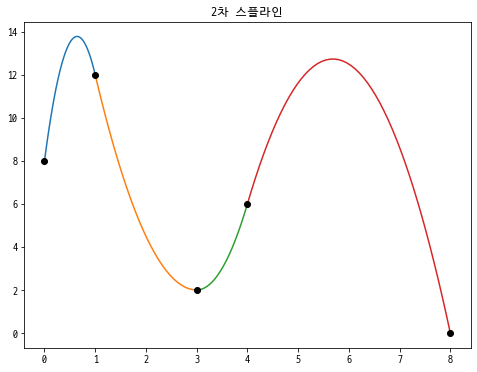

In [20]:
t = [0, 1, 3, 4, 8]
y = [8, 12, 2, 6, 0]

Q = quadratic_spline(t, y, 18)

fig, ax = plt.subplots(1, 1,figsize=(8, 6))

for i in range(len(t)-1):
    d = np.linspace(t[i], t[i+1])
    ax.plot(d, d**2*Q[i, 0] + d*Q[i, 1] + 1*Q[i, 2])
    ax.plot([t[i]], [y[i]], marker='o', color='black')
ax.plot([t[-1]], [y[-1]], marker='o', color='black')

ax.set_title("2차 스플라인")

plt.show()

# $k$차 스플라인

> 1. $S$의 정의역은 구간 $[a,b]$이다
> 2. $S, S', S'', \cdots, S^{(k-1)}은 모두 [a,b]$에서 연속이다.
> 3. a=t_0<t_1<\cdots<t_n=b이고 $S$가 각 부분구간 $[t_i,t_{i+1}]$에서 최대 $k$차 다항식인 점 $t_i$들ㅇ

# 3차 스플라인

* 1차 스플라인은 스플라인의 기울기가 급격히 변해 매끄럽지 않다.
* 2차 스플라인은 절점에서 곡률이 갑자기 변하기 때문에 매끄럽게 보이지 않는다.

따라서 이보다 높은 차수의 스플라인을 사용하게 되는데 보통 $k$차 스플라인에서 흔히 선택되는 차수는 $3$이다. 여러가지 이유가 있다.